In [46]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

tickers = ['AEVA', 'ATRO', 'DRD', 'GRPN', 'NGVC', 'RDFN', 'ROOT', 'TDUP']
start_date = "2022-01-01"
end_date = "2024-12-31"

data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
data = data.stack(-2)[["Close", "Volume"]]

[*********************100%***********************]  8 of 8 completed


In [47]:
df = data.unstack()

In [48]:
df.to_csv("stock_data.csv")

In [49]:
## Claculate return
close_df = df['Close']
log_returns = np.log(close_df / close_df.shift(1))
log_returns = log_returns.dropna()


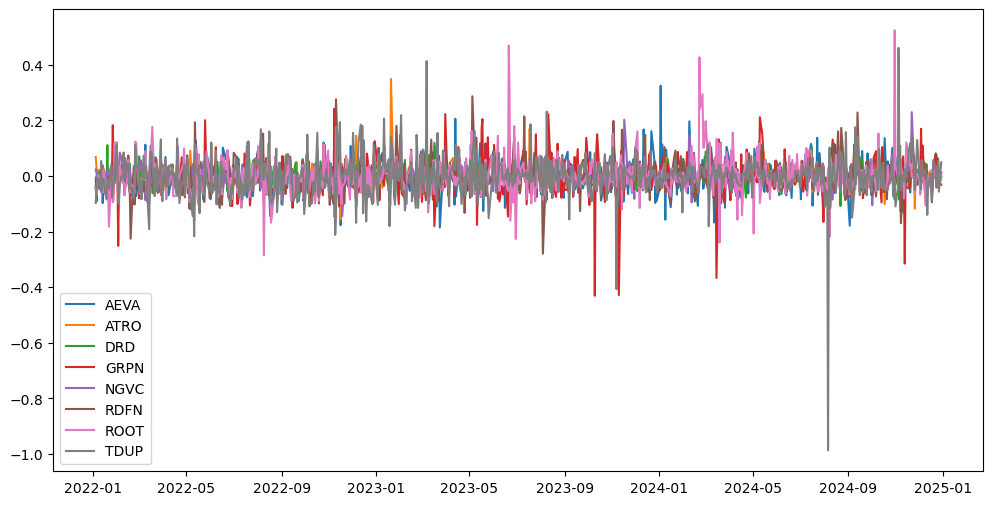

In [50]:
## return plot
plt.figure(figsize=(12, 6))
for ticker in log_returns.columns:
    plt.plot(log_returns.index, log_returns[ticker], label=ticker)
plt.legend()
plt.show()

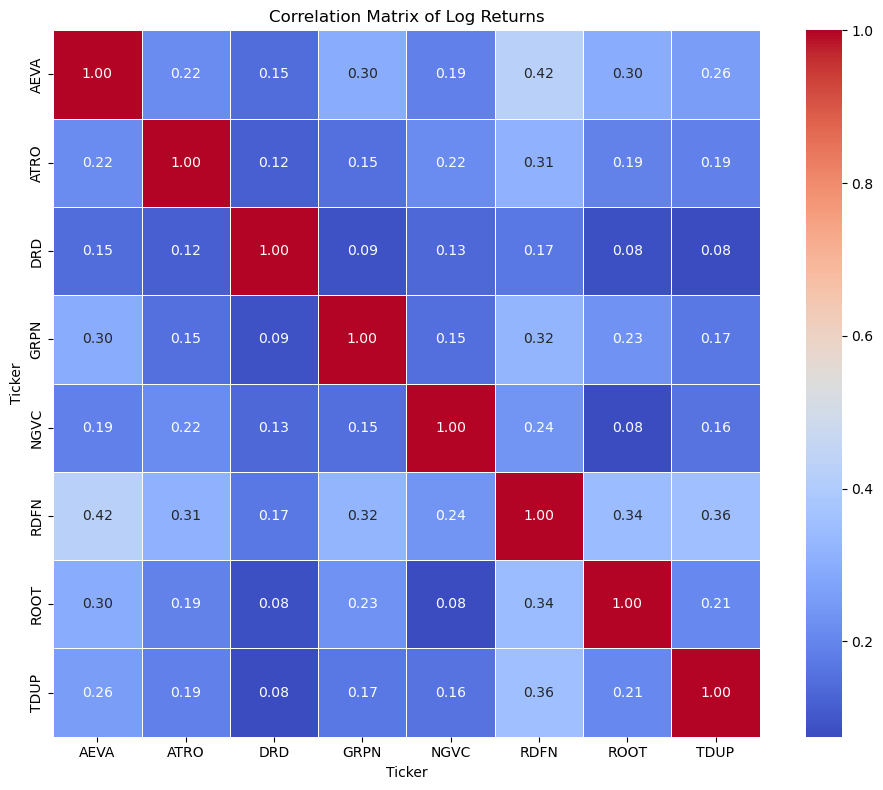

In [51]:
import seaborn as sns
correlation_matrix = log_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix of Log Returns')
plt.tight_layout()
plt.show()

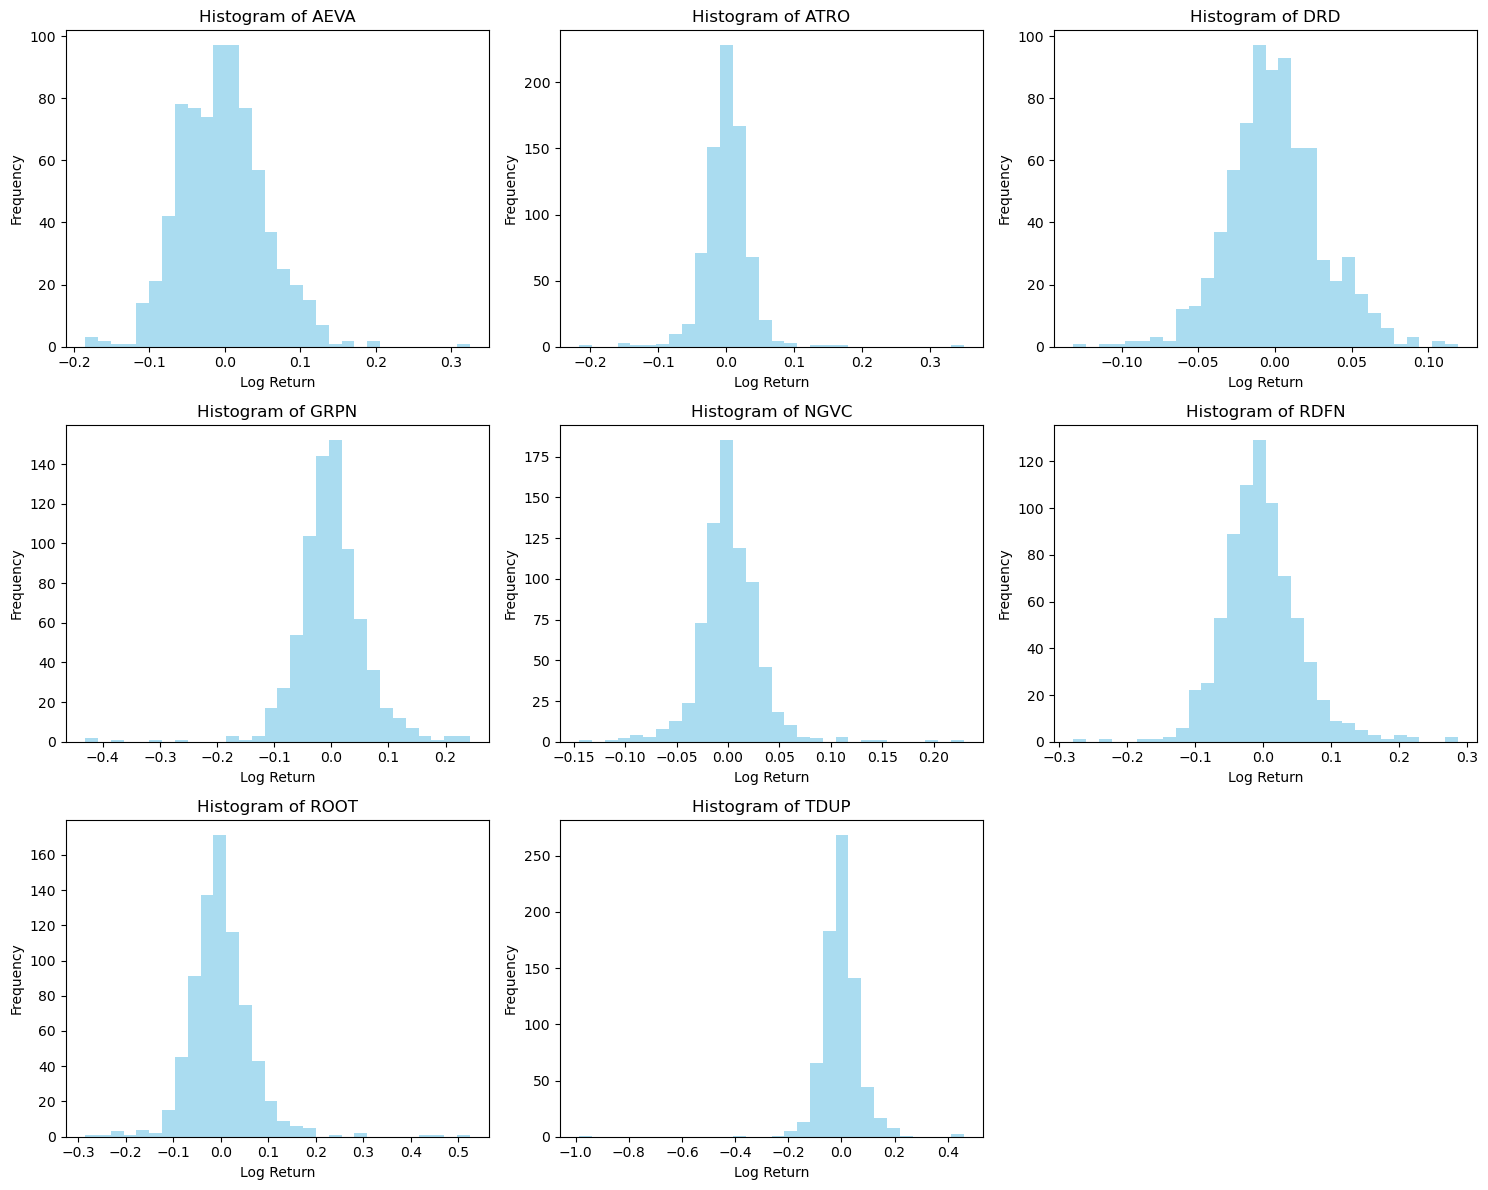

In [52]:
import matplotlib.pyplot as plt

num_tickers = len(log_returns.columns)
cols = 3 
rows = (num_tickers + cols - 1) // cols  


fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()  
for i, ticker in enumerate(log_returns.columns):
    axes[i].hist(log_returns[ticker], bins=30, alpha=0.7, color='skyblue')
    axes[i].set_title(f'Histogram of {ticker}')
    axes[i].set_xlabel('Log Return')
    axes[i].set_ylabel('Frequency')


for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


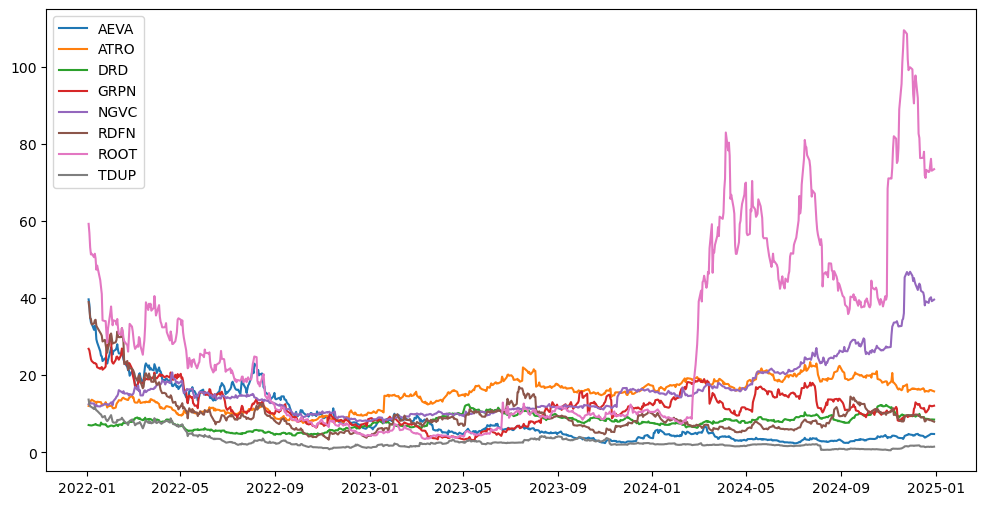

In [53]:
## Price plot
plt.figure(figsize=(12, 6))
for ticker in close_df.columns:
    plt.plot(close_df.index, close_df[ticker], label=ticker)
plt.legend()
plt.show()

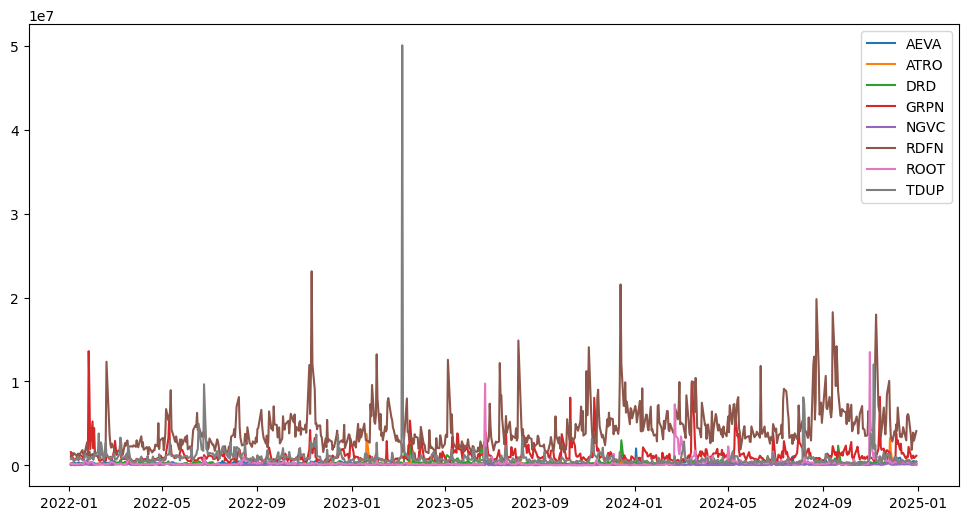

In [54]:
## volume plot
volume_df = df['Volume']
plt.figure(figsize=(12, 6))
for ticker in volume_df.columns:
    plt.plot(volume_df.index, volume_df[ticker], label=ticker)
plt.legend()
plt.show()

In [55]:
correlation_matrix = log_returns.corr()
print(correlation_matrix)

Ticker      AEVA      ATRO       DRD      GRPN      NGVC      RDFN      ROOT  \
Ticker                                                                         
AEVA    1.000000  0.215127  0.145665  0.296621  0.188919  0.424582  0.295642   
ATRO    0.215127  1.000000  0.116636  0.153863  0.216101  0.310424  0.194073   
DRD     0.145665  0.116636  1.000000  0.087671  0.133852  0.171436  0.084485   
GRPN    0.296621  0.153863  0.087671  1.000000  0.149637  0.321581  0.232529   
NGVC    0.188919  0.216101  0.133852  0.149637  1.000000  0.237262  0.075217   
RDFN    0.424582  0.310424  0.171436  0.321581  0.237262  1.000000  0.342988   
ROOT    0.295642  0.194073  0.084485  0.232529  0.075217  0.342988  1.000000   
TDUP    0.257968  0.188227  0.076044  0.172087  0.160741  0.355210  0.208531   

Ticker      TDUP  
Ticker            
AEVA    0.257968  
ATRO    0.188227  
DRD     0.076044  
GRPN    0.172087  
NGVC    0.160741  
RDFN    0.355210  
ROOT    0.208531  
TDUP    1.000000  


In [56]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm, probplot

def plot_return_diagnostics(returns, ticker):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f'{ticker} Return Diagnostics', fontsize=16)

    # 1. Histogram with normal curve
    sns.histplot(returns, kde=False, stat='density', ax=axs[0, 0], color='skyblue', bins=30)
    mu, std = returns.mean(), returns.std()
    xmin, xmax = axs[0, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    axs[0, 0].plot(x, norm.pdf(x, mu, std), 'k', linewidth=2, label='Normal Curve')
    axs[0, 0].set_title('Histogram with Normal Curve')
    axs[0, 0].legend()

    # 2. Boxplot
    sns.boxplot(x=returns, ax=axs[0, 1], color='lightgreen')
    axs[0, 1].set_title('Boxplot')

    # 3. Autocorrelation (ACF) plot
    plot_acf(returns, ax=axs[1, 0], lags=20)
    axs[1, 0].set_title('Autocorrelation (ACF)')

    # 4. Q-Q plot
    probplot(returns, dist="norm", plot=axs[1, 1])
    axs[1, 1].set_title('Normal Q-Q Plot')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


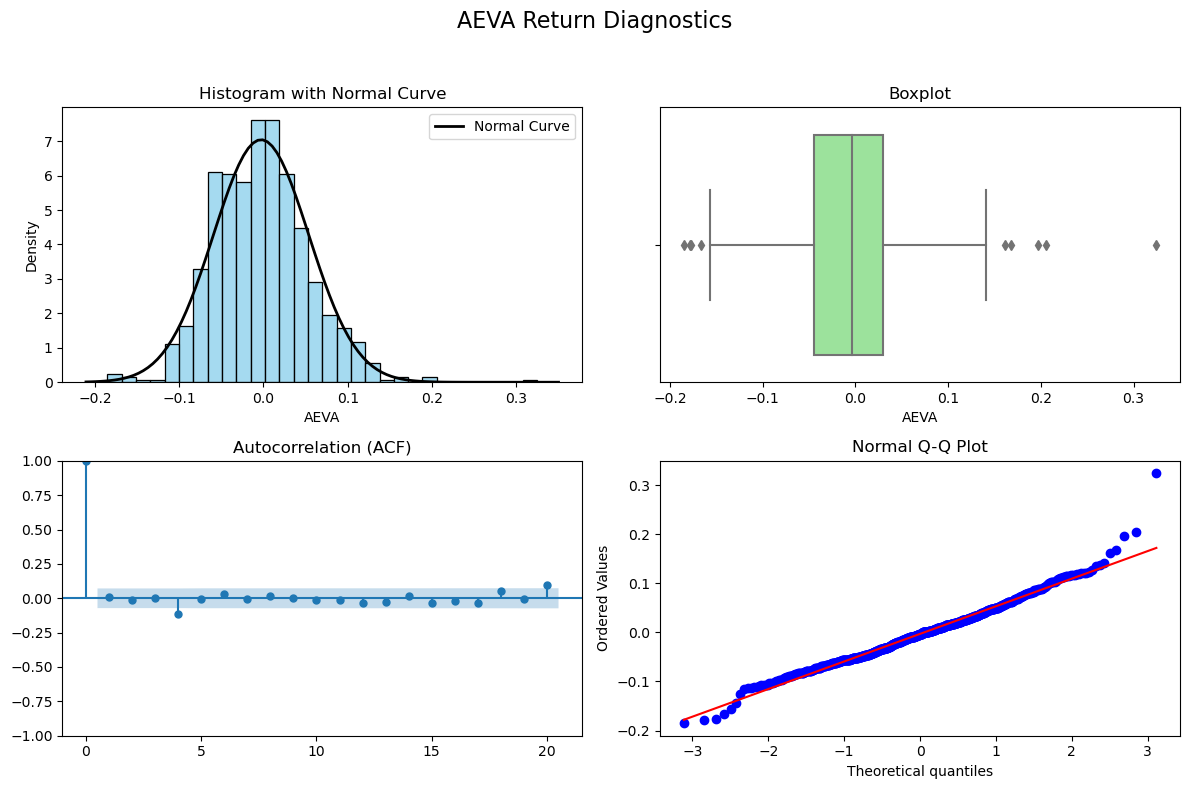

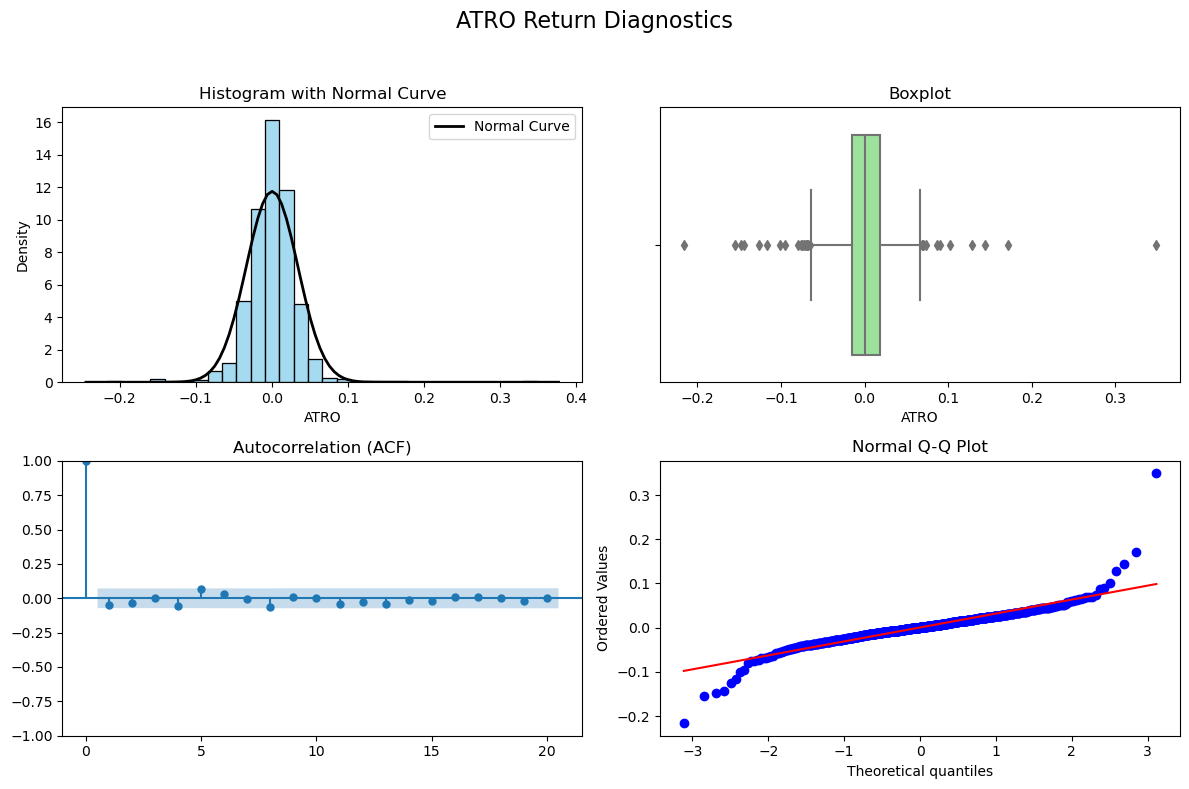

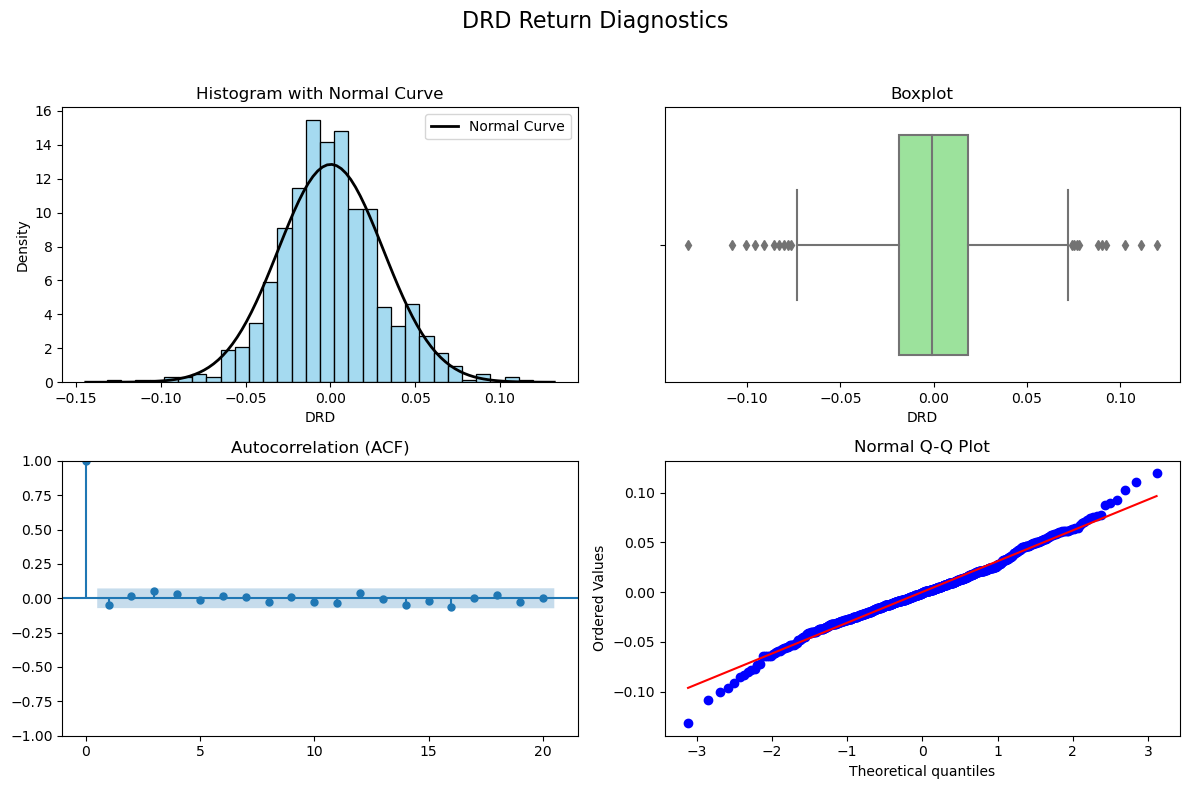

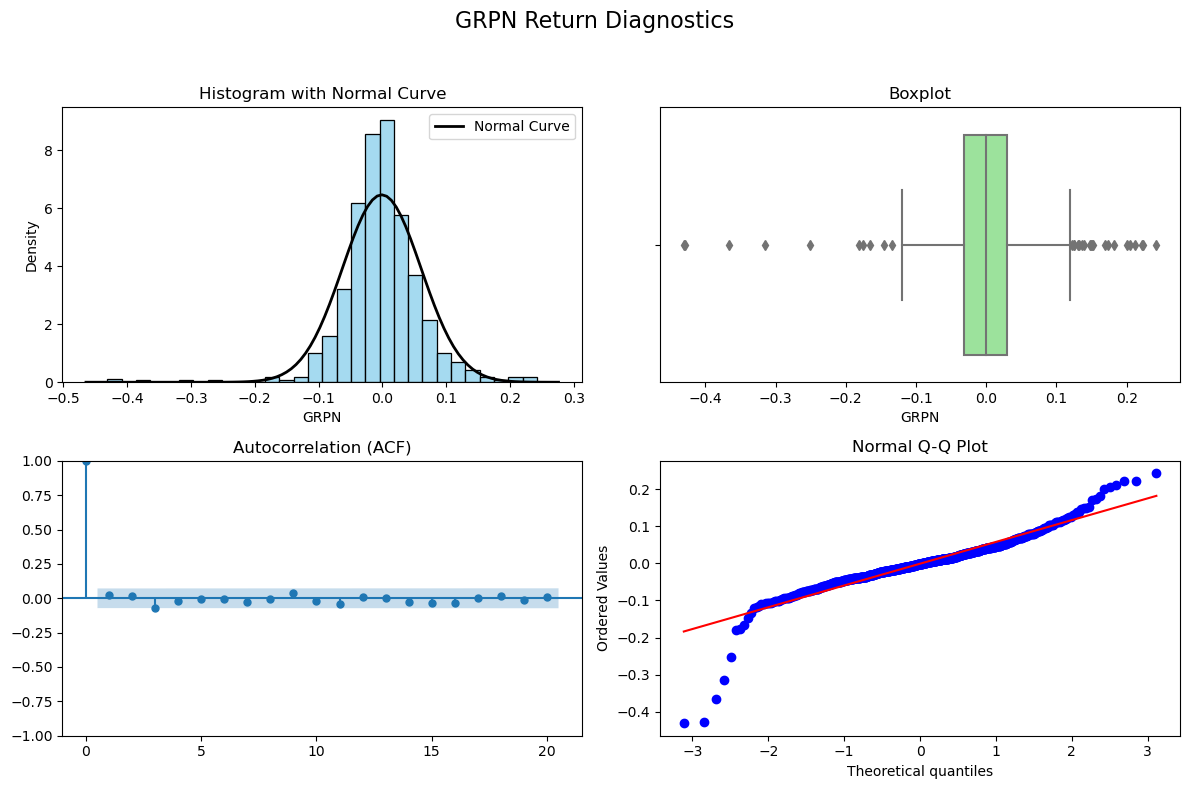

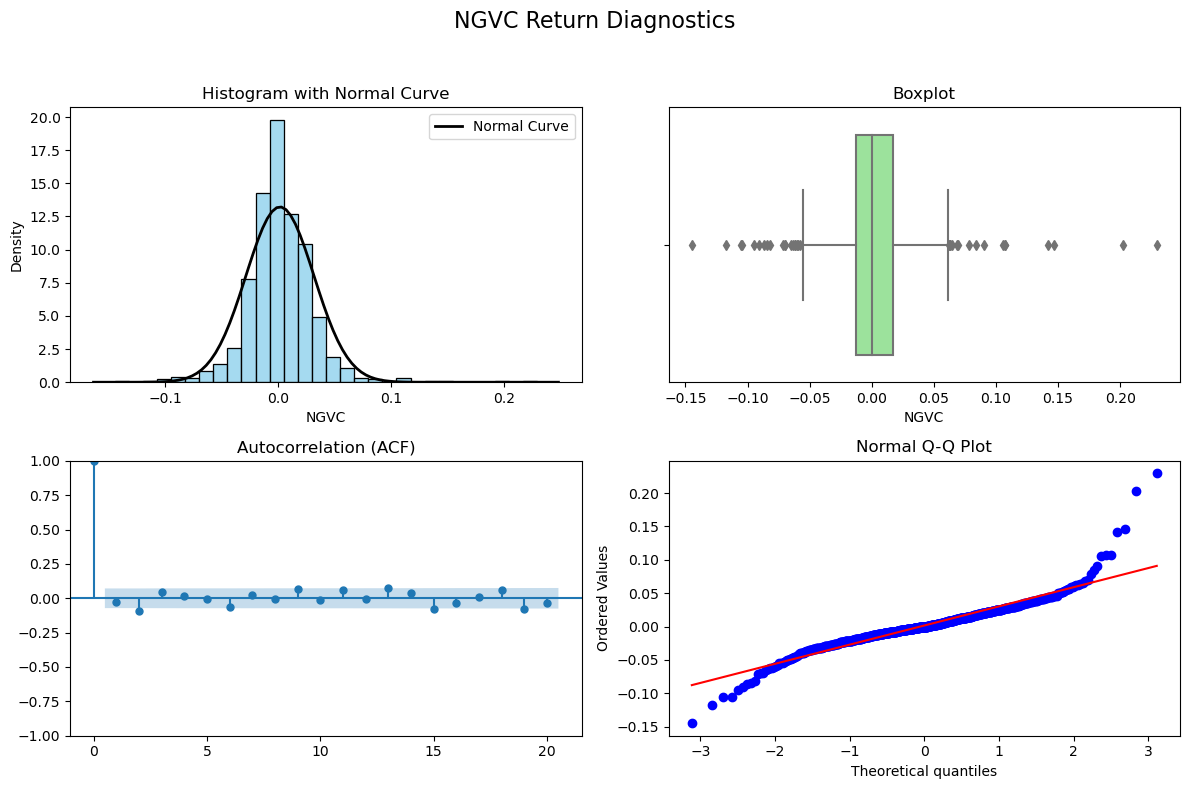

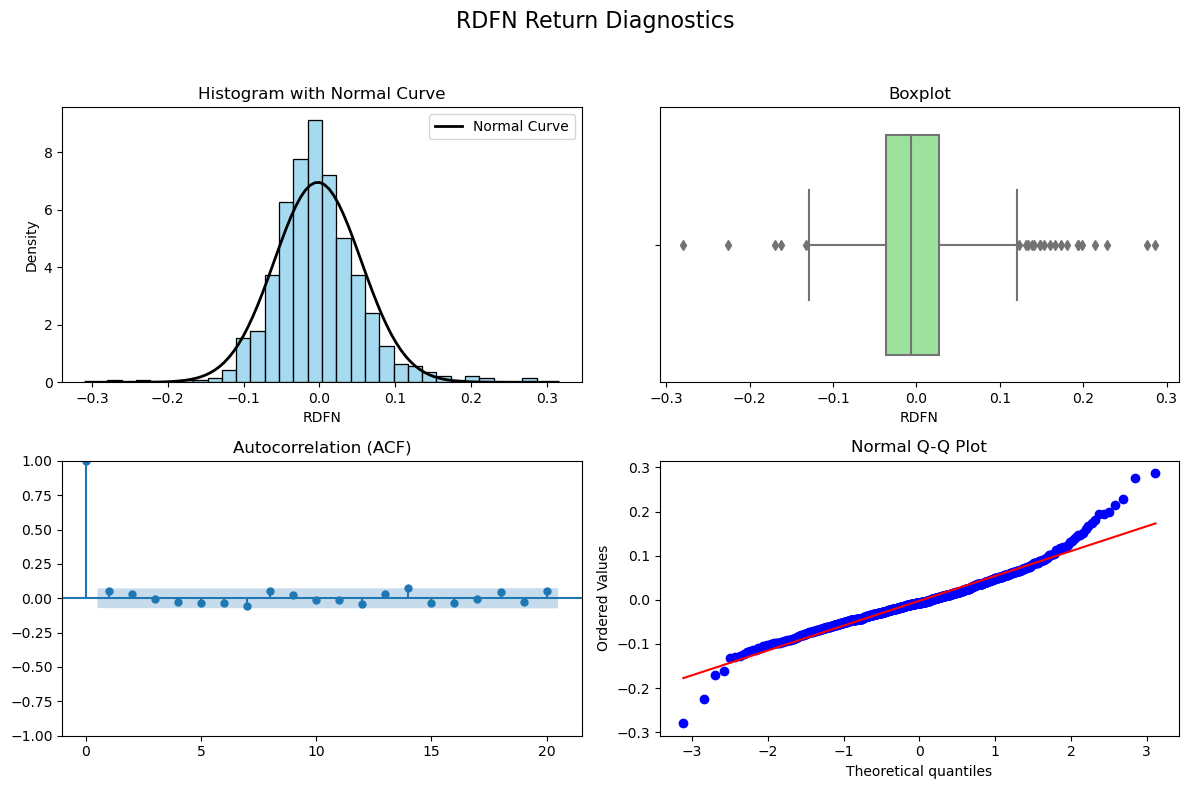

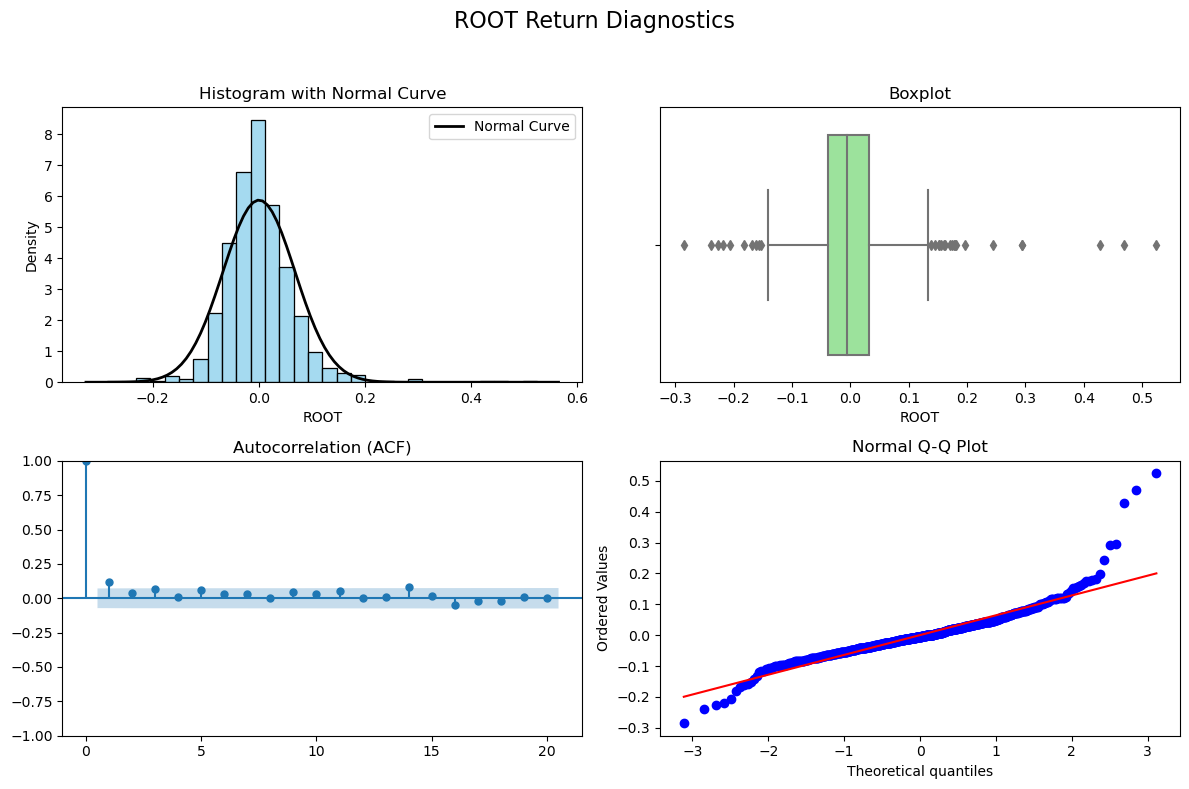

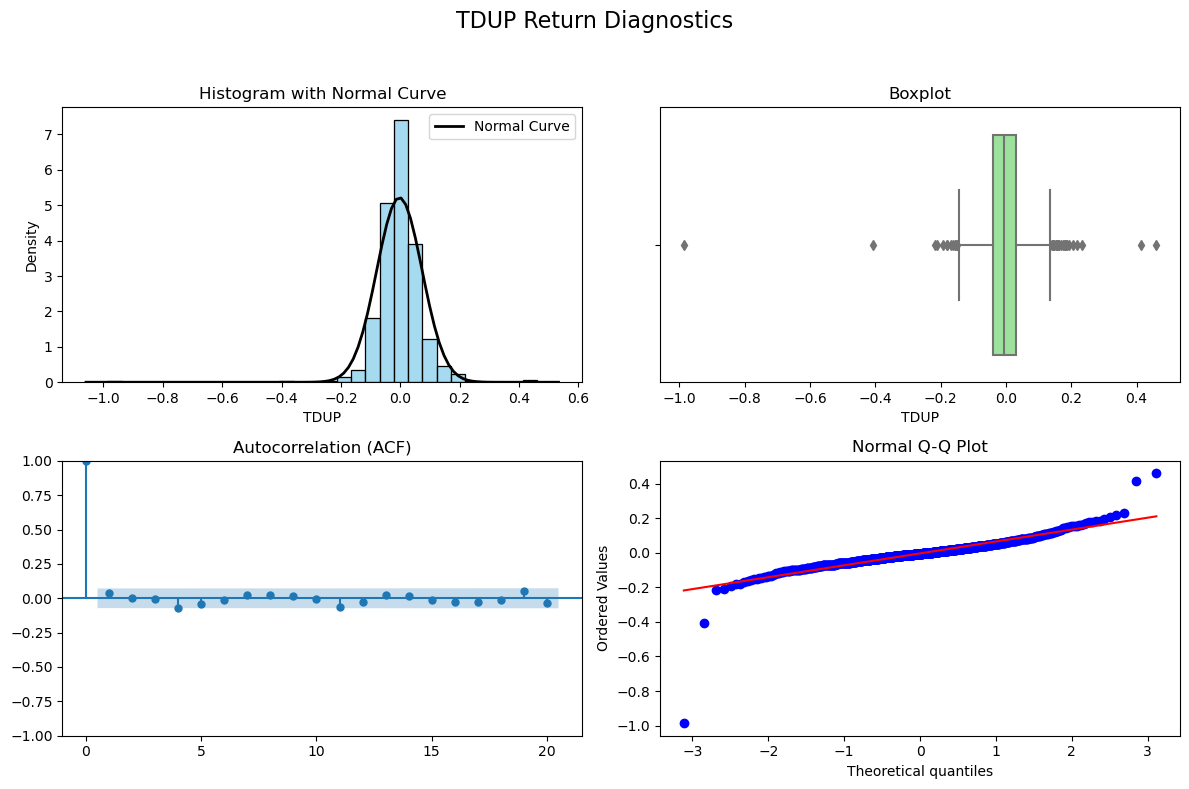

In [57]:
# Define the diagnostics plotting function (from earlier)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm, probplot

def plot_return_diagnostics(returns, ticker):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f'{ticker} Return Diagnostics', fontsize=16)

    # Histogram with normal curve
    sns.histplot(returns, kde=False, stat='density', ax=axs[0, 0], color='skyblue', bins=30)
    mu, std = returns.mean(), returns.std()
    xmin, xmax = axs[0, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    axs[0, 0].plot(x, norm.pdf(x, mu, std), 'k', linewidth=2, label='Normal Curve')
    axs[0, 0].set_title('Histogram with Normal Curve')
    axs[0, 0].legend()

    # Boxplot
    sns.boxplot(x=returns, ax=axs[0, 1], color='lightgreen')
    axs[0, 1].set_title('Boxplot')

    # ACF plot
    plot_acf(returns.dropna(), ax=axs[1, 0], lags=20)
    axs[1, 0].set_title('Autocorrelation (ACF)')

    # Q-Q plot
    probplot(returns, dist="norm", plot=axs[1, 1])
    axs[1, 1].set_title('Normal Q-Q Plot')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Loop through each ticker in the log_returns DataFrame
for ticker in log_returns.columns:
    plot_return_diagnostics(log_returns[ticker], ticker)


/Users/sophialin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


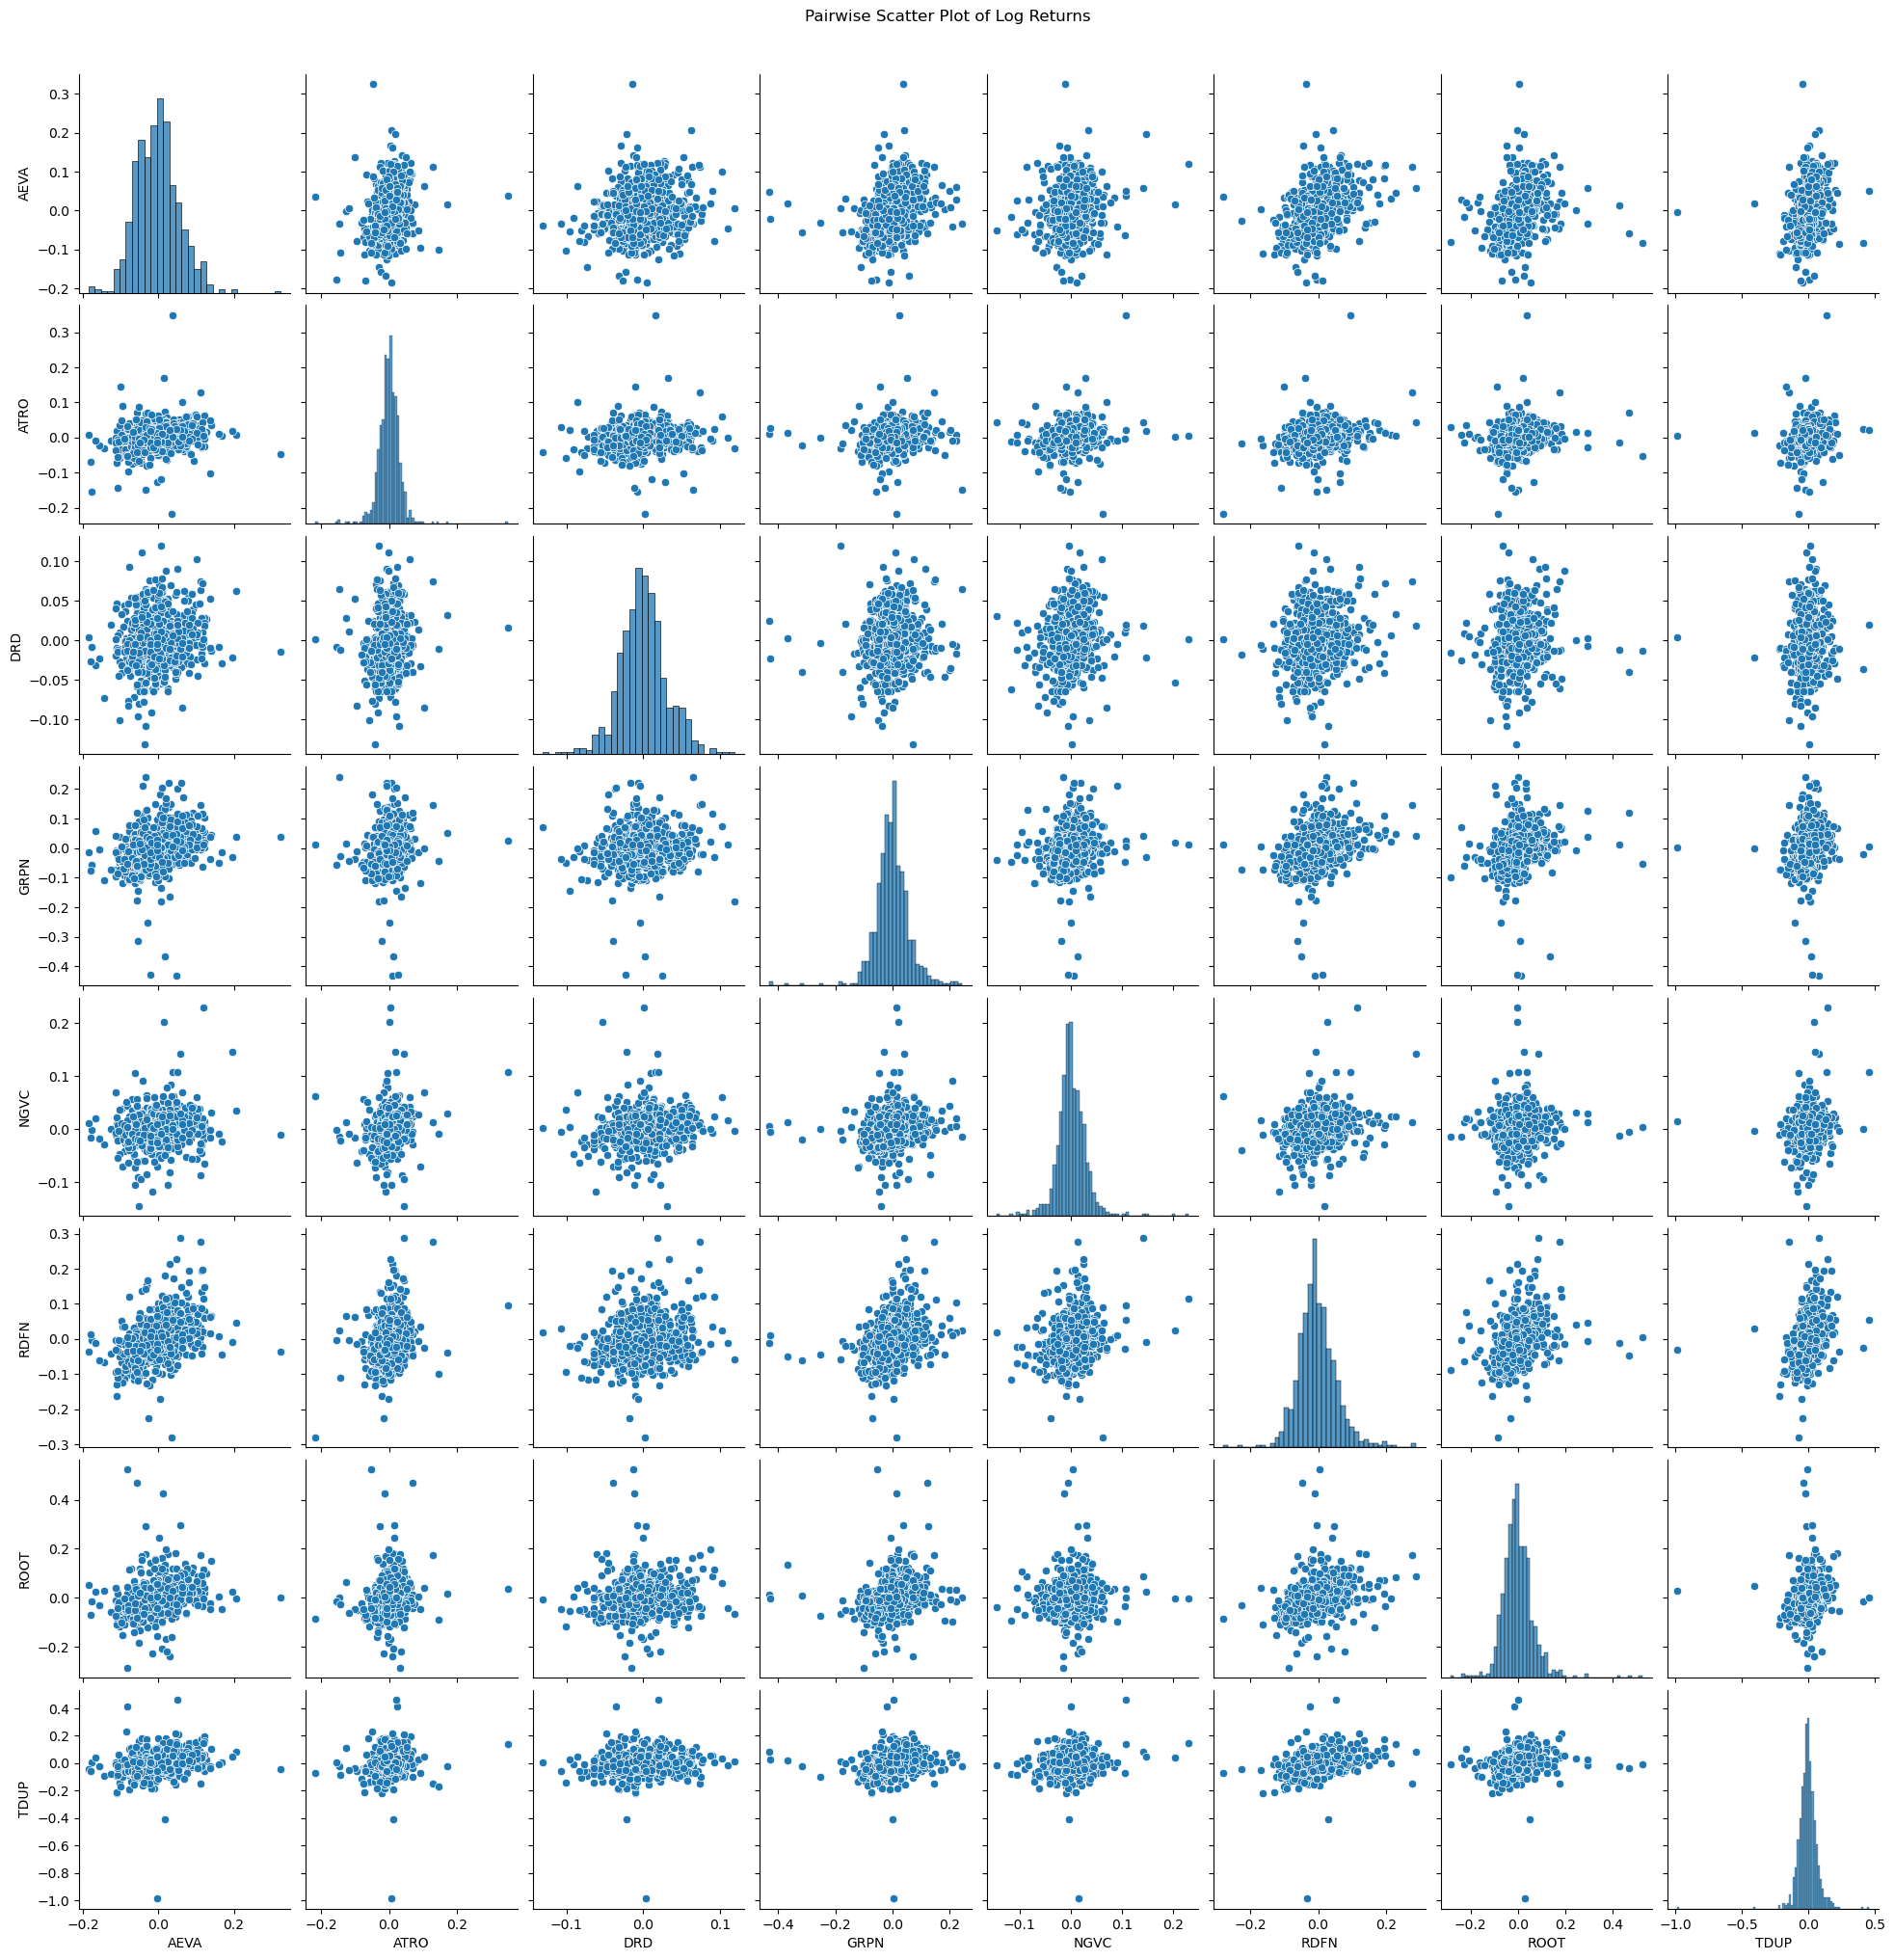

In [58]:

sns.pairplot(log_returns)
plt.suptitle("Pairwise Scatter Plot of Log Returns", y=1.02)
plt.show()


In [59]:
variance_table = log_returns.var()

variance_df = pd.DataFrame(variance_table, columns=['Variance'])
variance_df = variance_df.sort_values(by='Variance', ascending=False)
print(variance_df)


        Variance
Ticker          
TDUP    0.005844
ROOT    0.004616
GRPN    0.003815
RDFN    0.003294
AEVA    0.003210
ATRO    0.001154
DRD     0.000965
NGVC    0.000910


In [60]:
# Create an empty dictionary to store combined data
rolling_stats = {}

# Loop through each stock in log_returns
for ticker in log_returns.columns:
    # Daily return
    returns = log_returns[ticker]
    
    # 7-day rolling mean and variance
    rolling_mean = returns.rolling(window=7).mean()
    rolling_var = returns.rolling(window=7).var()
    
    # Combine into a DataFrame
    combined = pd.DataFrame({
        'Return': returns,
        '7D_Rolling_Mean': rolling_mean,
        '7D_Rolling_Variance': rolling_var
    })
    
    # Store in dictionary
    rolling_stats[ticker] = combined

combined_df = pd.concat(rolling_stats, axis=1)



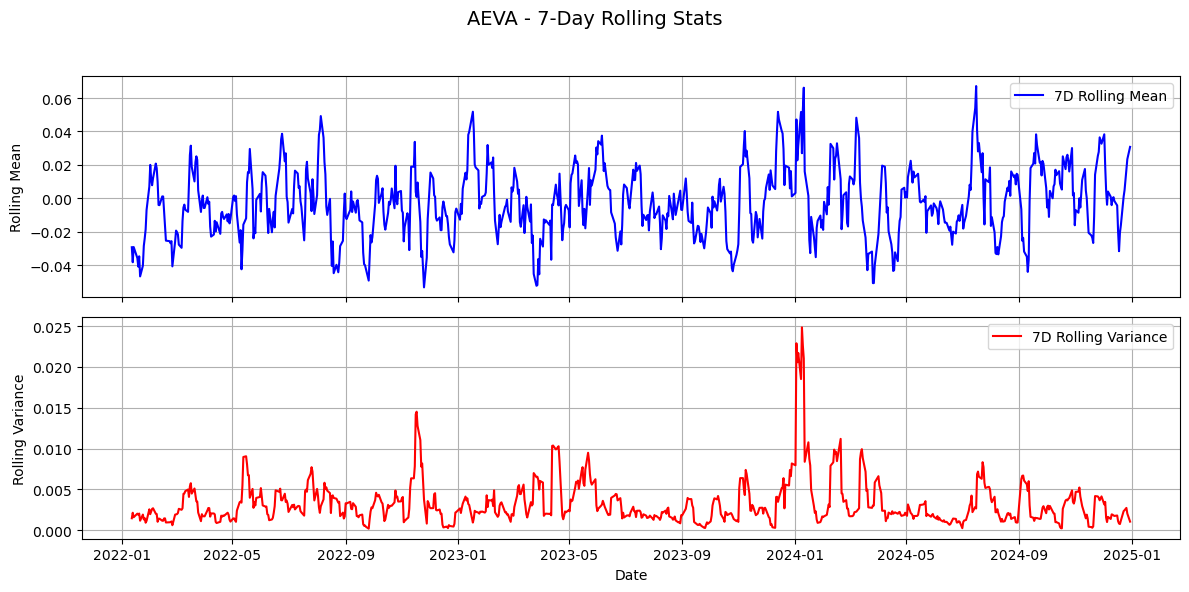

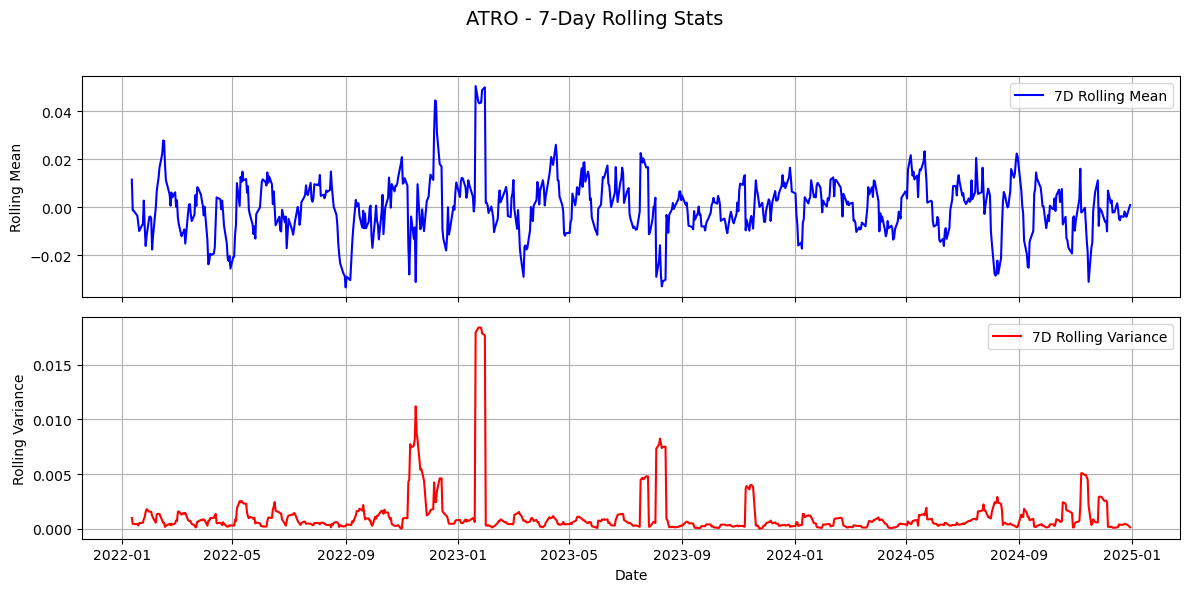

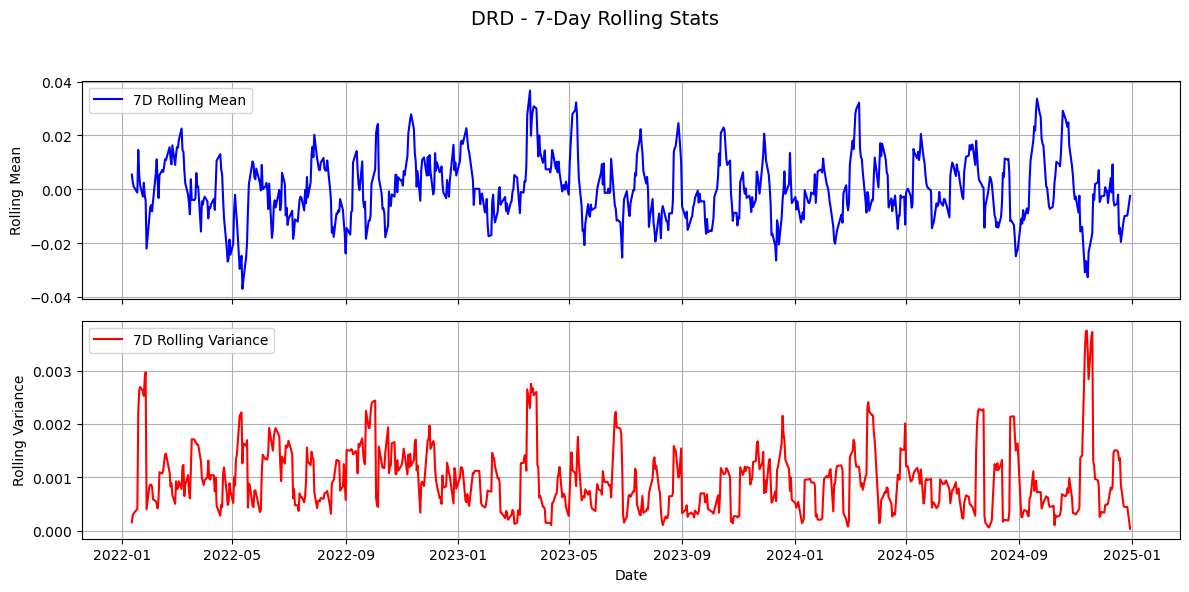

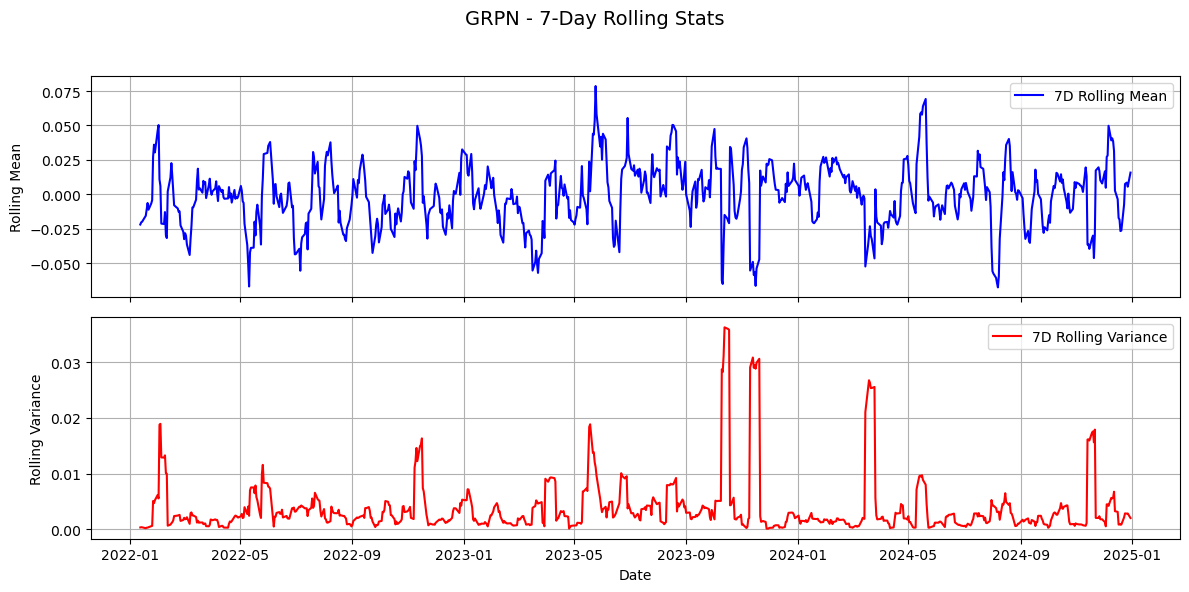

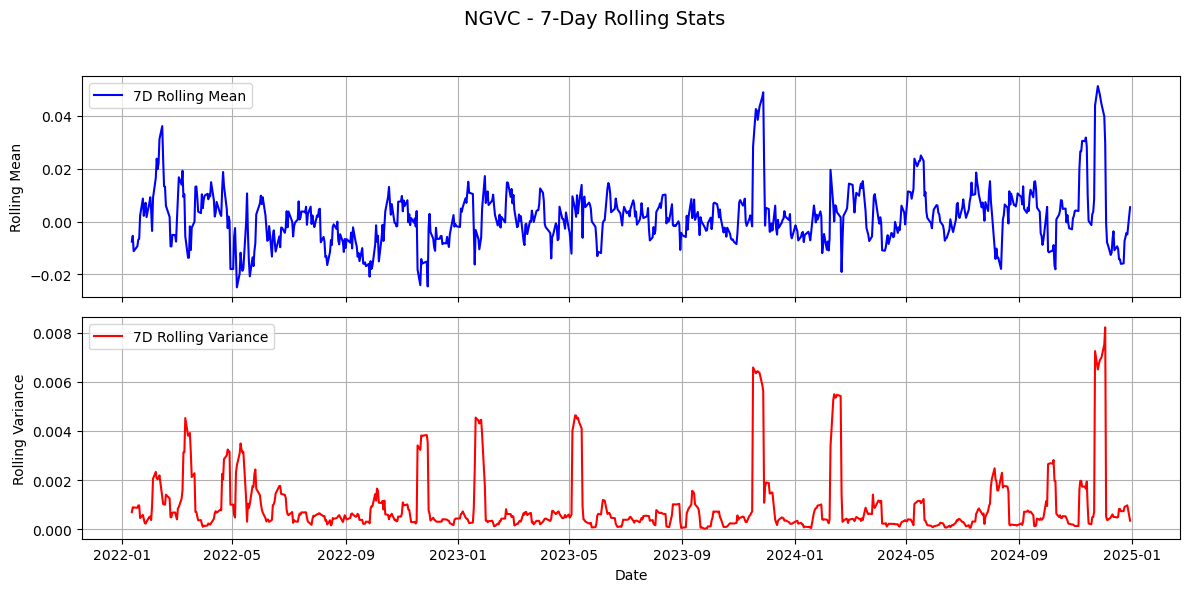

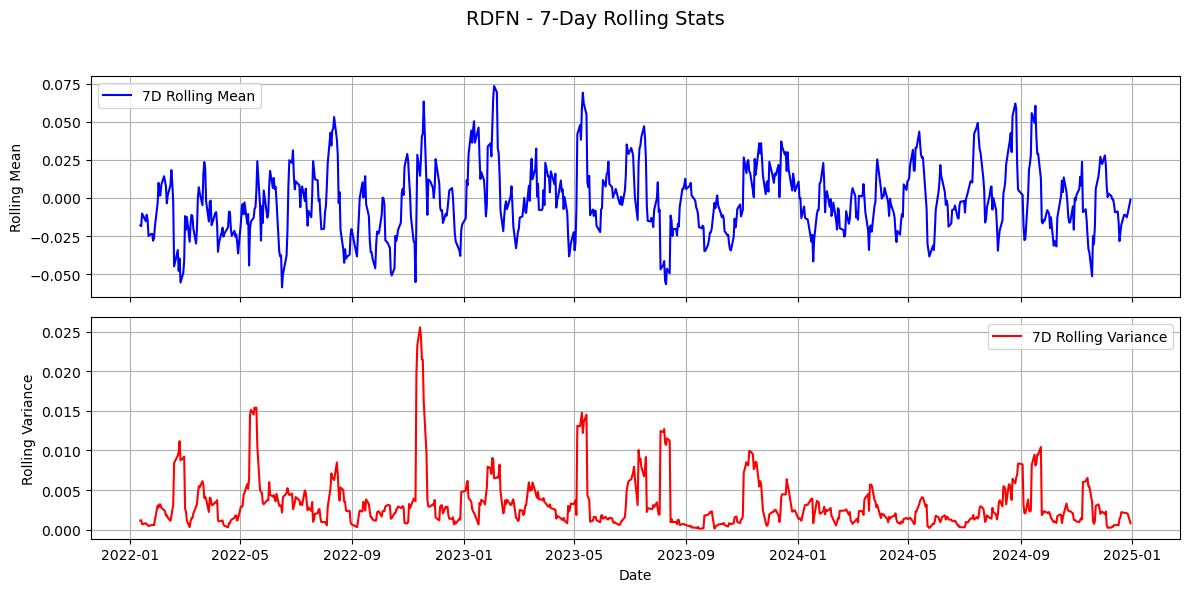

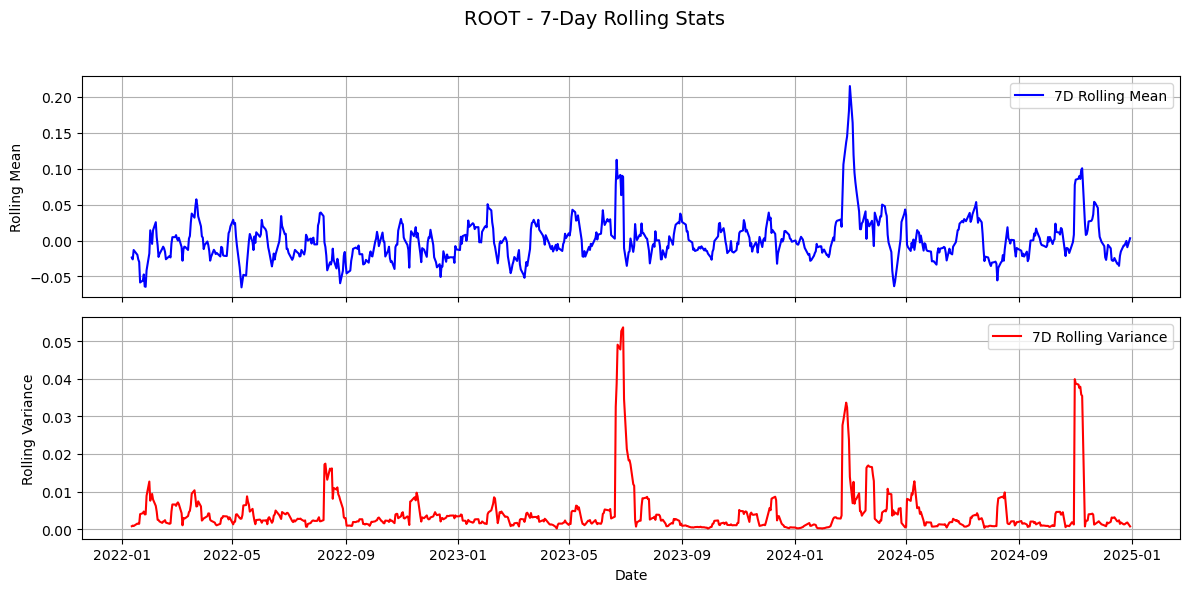

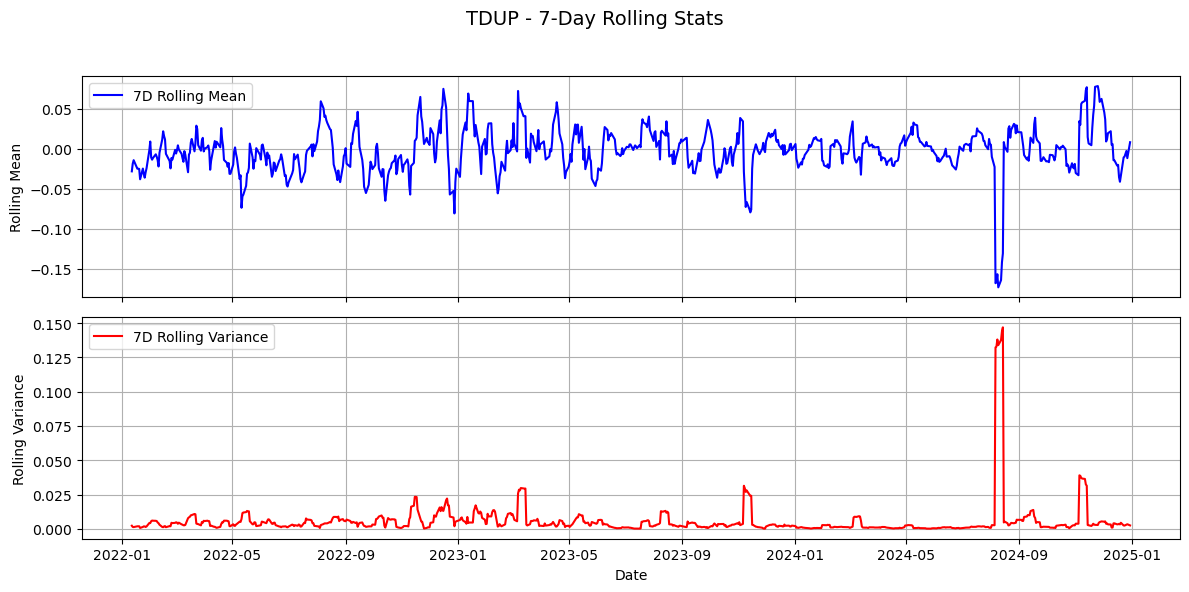

In [61]:

for ticker in log_returns.columns:
    # Extract that ticker's data
    data = combined_df[ticker]

    # Create a 2-panel plot
    fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    fig.suptitle(f'{ticker} - 7-Day Rolling Stats', fontsize=14)

    # Plot rolling average
    axs[0].plot(data.index, data['7D_Rolling_Mean'], label='7D Rolling Mean', color='blue')
    axs[0].set_ylabel('Rolling Mean')
    axs[0].legend()
    axs[0].grid(True)

    # Plot rolling variance
    axs[1].plot(data.index, data['7D_Rolling_Variance'], label='7D Rolling Variance', color='red')
    axs[1].set_ylabel('Rolling Variance')
    axs[1].set_xlabel('Date')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [62]:
features = pd.read_csv("all_features.csv")

In [63]:
sentiment = features[["Date", "weighted_sentiment"]]
sentiment.Date = pd.to_datetime(sentiment.Date)

/var/folders/w_/wzxdnvq13mxbxkhjgg1mty_80000gn/T/ipykernel_4734/1493024996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment.Date = pd.to_datetime(sentiment.Date)


In [64]:
sentiment = sentiment.set_index("Date")

In [79]:
var = combined_df["TDUP"]["7D_Rolling_Variance"].dropna()
var.index = pd.to_datetime(var.index)

In [80]:
var = pd.DataFrame(var)

In [81]:
merged = pd.merge(var, sentiment, left_on = var.index, right_on = sentiment.index, how = "left")

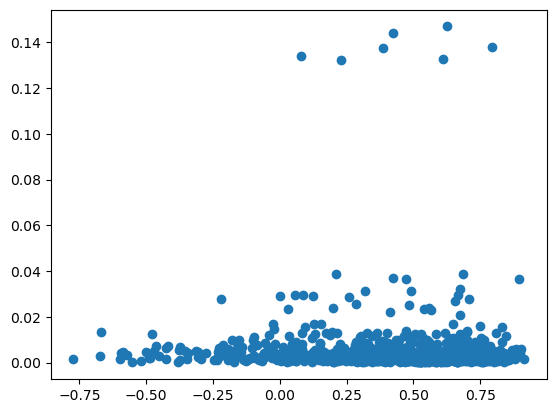

In [82]:
plt.scatter("weighted_sentiment", "7D_Rolling_Variance", data = merged)

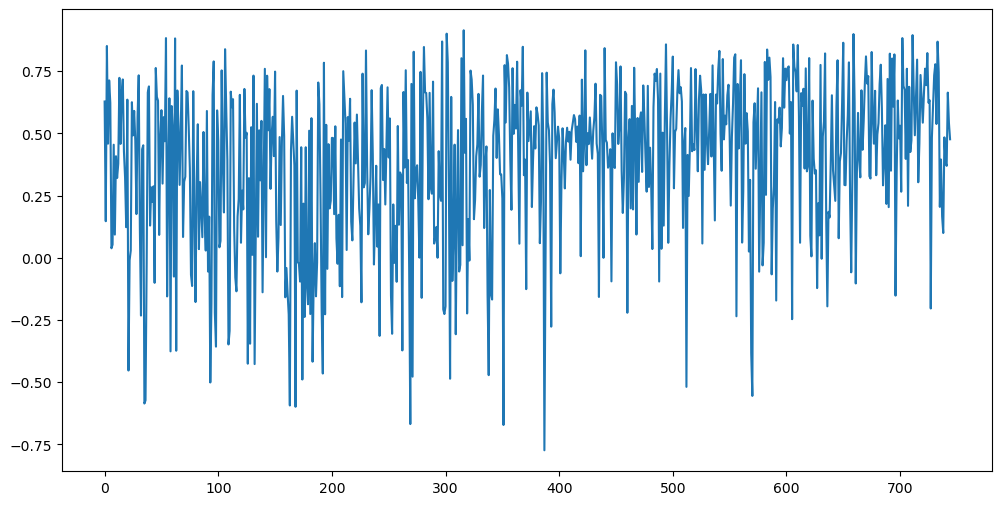

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(merged.index, merged["weighted_sentiment"])